## WeRateDogs Data Wrangling Project

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

### Gather

In [2]:
#Reading the first, given data file as a Pandas DataFrame.
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Programmatically downoading the tsv file from website with requests library.
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Reading the second data set as a Pandas DataFrame.
image_predictions = pd.read_csv('image_predictions.tsv', delimiter = '\t')

In [5]:
#Using tweepy for accessing Twitter's API.
tweet_id_ =list(twitter_archive['tweet_id'])

#Replacing API keys, tokens and secrets.

consumer_key = ' '
consumer_secret = ' '
access_token = ''
access_secret = ''

#Creating variables for twitter query.
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#Setting twitter rate limit.
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


#For loop for querying JSON data into tweet_json.txt.

with open('tweet_json.txt','a',encoding = 'utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        json.dump(tweet._json, f)
        f.write('\n')

In [6]:
#For loop to put each tweet into a list.

tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

        
tweet_file.close()

In [7]:
#Creating a data frame for tweets storage.
tweet_info = pd.DataFrame()

#Adding selected variables into it.
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Access

### twitter_archive (descriptive)

In [8]:
#Viewing first 10 rows of our dataframe.
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#Then viewing last 10 rows.
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
#Viewing information about the dataframe.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Viewing descriptive statistics.
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### image_predictions

In [12]:
#Viewing first 10 rows.
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
#Viewing last 10 rows.
image_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
#Looking for non-null values (none found).
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#Viewing descriptive statistics.
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#Looking at the breeds values list.
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

### twitter_archive (content)

In [17]:
#Looking at the names values list.
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [18]:
#Looking for strange names - first, lowercase.
twitter_archive.loc[(twitter_archive['name'].str.islower())]['name']

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

In [19]:
#Then, too short.
twitter_archive.loc[(twitter_archive['name'].apply(len) < 3)]['name']

56       a
393     Mo
446     Bo
449     Bo
553     Bo
583     Bo
649      a
679     Bo
686     Bo
759     an
775      O
801      a
820     Al
852     my
876     Bo
978     Bo
1002     a
1004     a
1017     a
1025    an
1049     a
1193     a
1207     a
1340     a
1351     a
1361     a
1362    an
1368     a
1382     a
1499     a
        ..
2146     a
2153     a
2161     a
2191     a
2198     a
2204    an
2211     a
2218     a
2219    Jo
2222     a
2235     a
2249     a
2255     a
2264     a
2273     a
2287     a
2304     a
2311     a
2314     a
2327     a
2333    an
2334     a
2335    an
2347     a
2348     a
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

In [20]:
#Some of these might be names though, let's check:
twitter_archive.loc[(twitter_archive['name'].str.islower()) & 
                    (twitter_archive['text'].str.contains('named'))]['name']

1853     a
1955     a
2034     a
2066     a
2116     a
2125     a
2128     a
2146     a
2161     a
2191     a
2204    an
2218     a
2235     a
2249     a
2255     a
2264     a
2273     a
2304     a
2311     a
2314     a
Name: name, dtype: object

In [21]:
#Same procedure for too short:
twitter_archive.loc[(twitter_archive['name'].apply(len) < 3) &
                    (twitter_archive['text'].str.contains('named'))]['name']

1853     a
1955     a
2034     a
2066     a
2116     a
2125     a
2128     a
2146     a
2161     a
2191     a
2204    an
2218     a
2235     a
2249     a
2255     a
2264     a
2273     a
2304     a
2311     a
2314     a
Name: name, dtype: object

In [22]:
#Summing up the names starting with lower case letter
twitter_archive.name.str.islower().sum()

109

In [23]:
#Original tweets.
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [24]:
#Checking the types of sources (Iphones seem to prevail)
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
#Summing up missing values for each feature.
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
#Checking unusual rating numerators. 
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
#Cheking numerators over >20 because some ratings are obviously >10 out of 10.
twitter_archive[twitter_archive['rating_numerator'] > 20]['rating_numerator']

188      420
189      666
290      182
313      960
340       75
433       84
516       24
695       75
763       27
902      165
979     1776
1120     204
1202      50
1228      99
1254      80
1274      45
1351      60
1433      44
1634     143
1635     121
1712      26
1779     144
1843      88
2074     420
Name: rating_numerator, dtype: int64

### Quality assesment

#### twitter_archive

1. Dataset contains retweets data which we don't need for this project and therefore going to remove.
2. "Expanded_urls" have many tweets without images and need to be removed.
3. Columns "in_reply" have many missing values and need to be removed as this data is not helpful for our research.
4. Long url links and sources should be optimized for readability.
5. Extra characters after & need to be removed.
6. Rating_numerators and denominators have some incorrect values and those with decimals not showing full float.
7. Some of the dog names are not names at all.
8. "Timestamp" data is incorrect and needs to be fixed.

#### image_predictions

1. p1,p2 etc. columns need to be renamed for better understanding.
2. First letters in dogs breed predictions should be unified (either lower or upper case).


### Tidiness assessment
1. Stage coulmn needs to be created to contain all the 'doggo', 'floofer', 'pupper', 'puppo' columns content from twitter_archive.
2. The tweet_data and 'image_predictions' table should be joined to the twitter_archive table.


## Cleaning

In [28]:
#Copying dataframes for further cleaning.
tweet_info_clean = tweet_info.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()

In [29]:
#Merging dog stages into a single variable and dropping unnesessary variables
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract(
    '(puppo|pupper|floofer|doggo)', expand=True)
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

In [30]:
#Checking the changes.
print(twitter_archive_clean.shape)
print(twitter_archive.shape)

(2356, 14)
(2356, 17)


In [31]:
#Adding tweet_info and image_predictions to twitter_archive table.
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_info_clean, left_on='tweet_id', right_on='id', how='inner')
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')
twitter_archive_clean = twitter_archive_clean.drop('id', axis=1)

In [32]:
#Checking the changes.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 27 columns):
tweet_id                      2072 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2072 non-null object
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           78 non-null float64
retweeted_status_user_id      78 non-null float64
retweeted_status_timestamp    78 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
dog_stage                     338 non-null object
retweet_count                 2072 non-null int64
favorite_count                2072 non-null int64
jpg_url                       2072 non-null object
img_num                       2072 non

In [33]:
#Removing expanded_urls (rows with no images).
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])
twitter_archive_clean.expanded_urls.isnull().sum()

0

In [34]:
#Dropping retweets and other unnecessary columns.
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id', 'img_num']
twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)


In [35]:
#Checking the changes.
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 21 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null object
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  2072 non-null object
dog_stage             338 non-null object
retweet_count         2072 non-null int64
favorite_count        2072 non-null int64
jpg_url               2072 non-null object
p1                    2072 non-null object
p1_conf               2072 non-null float64
p1_dog                2072 non-null bool
p2                    2072 non-null object
p2_conf               2072 non-null float64
p2_dog                2072 non-null bool
p3                    2072 non-null object
p3_conf               2072 non-null float64
p3_dog                2072 non-null bool

In [36]:
#Renaming p1, p2 etc. columns for readability.
image_predictions.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog','p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog','p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [37]:
#Checking the changes.
image_predictions.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
#Changing timestamp data to datetime.
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [39]:
#Checking the changes.
twitter_archive_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [40]:
#Changing missing values in names list from None to NaN.
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.NaN)


In [41]:
#Checking the changes.
twitter_archive_clean['name'].value_counts().head(10)


a          55
Charlie    11
Tucker     10
Lucy       10
Penny      10
Oliver     10
Cooper     10
Bo          8
Winston     8
Sadie       8
Name: name, dtype: int64

In [42]:
#Capitalizing lower case names.
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()


In [43]:
#Checking the changes.
twitter_archive_clean['name'].str.islower().sum()


0

In [44]:
twitter_archive_clean['name'].value_counts().head(30)

A          55
Charlie    11
Oliver     10
Cooper     10
Tucker     10
Lucy       10
Penny      10
Winston     8
Sadie       8
Lola        8
Bo          8
An          7
Daisy       7
The         7
Toby        7
Dave        6
Milo        6
Bella       6
Rusty       6
Stanley     6
Bailey      6
Scout       6
Koda        6
Jax         6
Chester     5
Louis       5
Larry       5
Leo         5
Alfie       5
Oscar       5
Name: name, dtype: int64

In [45]:
not_name_list = ['A','An']
for i in not_name_list:
        twitter_archive_clean['name'].replace(i, 'NaN', inplace=True)

In [46]:
#Fixing rating numerator and denominators that are not actually ratings.
fix_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

fix_ratings.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                     1
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5            1
10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k                                                        1
Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp          1
These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC              1
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv               1
This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when ca

In [47]:
# Setting correct numerators for specific tweets.
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [48]:
#Checking the changes.
#twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]
#twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")
twitter_archive_clean.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [49]:
#Fixing rating numerators that have decimals.
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN,10306,...,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
556,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,7004,...,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
612,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NaN,1862,...,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1450,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,NaN,pupper,540,...,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [50]:
# Changing datatype of rating_numerator and denominator to float.
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')

In [51]:
#Checking the results.
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,NaN,10306,...,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
556,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,NaN,7004,...,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
612,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,NaN,1862,...,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1450,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,NaN,pupper,540,...,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [52]:
#Optimizing the source content.
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2031
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [53]:
#Replacing urls with text.
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

In [54]:
#Checking the changes.
twitter_archive_clean['source'].value_counts()

Twitter for iphone    2031
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [55]:
#Removing extra characters after '&'.
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')


In [56]:
#Checking the changes.
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 21 columns):
tweet_id              0 non-null int64
timestamp             0 non-null datetime64[ns]
source                0 non-null object
text                  0 non-null object
expanded_urls         0 non-null object
rating_numerator      0 non-null float64
rating_denominator    0 non-null float64
name                  0 non-null object
dog_stage             0 non-null object
retweet_count         0 non-null int64
favorite_count        0 non-null int64
jpg_url               0 non-null object
p1                    0 non-null object
p1_conf               0 non-null float64
p1_dog                0 non-null bool
p2                    0 non-null object
p2_conf               0 non-null float64
p2_dog                0 non-null bool
p3                    0 non-null object
p3_conf               0 non-null float64
p3_dog                0 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(5), int64(3), objec

# Store

In [57]:
#Save our gathered, assessed, and cleaned DataFrame to csv file.
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [58]:
twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 21 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null object
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null float64
rating_denominator    2072 non-null float64
name                  1434 non-null object
dog_stage             338 non-null object
retweet_count         2072 non-null int64
favorite_count        2072 non-null int64
jpg_url               2072 non-null object
p1                    2072 non-null object
p1_conf               2072 non-null float64
p1_dog                2072 non-null bool
p2                    2072 non-null object
p2_conf               2072 non-null float64
p2_dog                2072 non-null bool
p3                    2072 non-null object
p3_conf               2072 non-null float64
p3_dog                2072 non-null 

# Analyze and Visualize

Here we are going to perform visualization of our findings.


In [59]:
df = pd.read_csv('twitter_archive_master.csv')

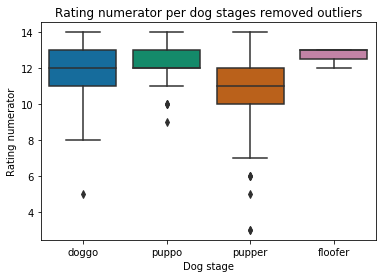

In [60]:
bplot = sns.boxplot(x = 'dog_stage', 
                    y = 'rating_numerator', 
                    palette = 'colorblind',
                    data = df.loc[df['rating_numerator'] < 25])
bplot.set_title('Rating numerator per dog stages removed outliers')
bplot.set_xlabel('Dog stage')
bplot.set_ylabel('Rating numerator');

In [61]:
df.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,75.0,14.226667,22.267764,5.0,11.0,12.0,13.0,204.0
floofer,3.0,12.666667,0.577350,12.0,12.5,13.0,13.0,13.0
pupper,231.0,12.901558,14.789213,3.0,10.0,11.0,12.0,143.0
puppo,29.0,12.137931,1.186957,9.0,12.0,12.0,13.0,14.0


From this statistic we can tell that doggos are averagely getting the highest rates. At the second place are puppers, then floofers and puppos. Although there are much more (231) tweets about puppers than about dogs at other stages, their mean rate (12.9) is surprisingly not the highest.

In [62]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [63]:
df.groupby(df['timestamp'].dt.weekday_name).agg(['median','count'])

tweet_id       rating_numerator       rating_denominator  \
                       median count           median count             median   
timestamp                                                                       
Friday     715715004230719488   294             11.0   294               10.0   
Monday     714258258790387712   339             11.0   339               10.0   
Saturday   709867615492163584   262             11.0   262               10.0   
Sunday     706328190346723328   262             11.0   262               10.0   
Thursday   707741517457260544   291             11.0   291               10.0   
Tuesday    724877723676590080   310             11.0   310               10.0   
Wednesday  715105190033129472   314             11.0   314               10.0   

                retweet_count       favorite_count        ...  p1_dog        \
          count        median count         median count  ...  median count   
timestamp                                                 ...                 
Friday      294        1435.5   294         4171.0   294  ...    True   294   
Monday      339        1315.0   339         3780.0   339  ...    True   339   
Saturday    262        1196.0   262         3647.5   262  ...    True   262   
Sunday      262        1369.5   262         3569.5   262  ...    True   262   
Thursday    291        1388.0   291         3933.0   291  ...    True   291   
Tuesday     310        1506.5   310         4129.0   310  ...    True   310   
Wednesday   314        1470.5   314         3777.0   314  ...    True   314   

            p2_conf       p2_dog         p3_conf       p3_dog        
             median count median count    median count median count  
timestamp                                                            
Friday     0.128657   294   True   294  0.049048   294   True   294  
Monday     0.112676   339   True   339  0.060659   339   True   339  
Saturday   0.113444   262   True   262  0.052388   262   True   262  
Sunday     0.112291   262   True   262  0.045834   262   True   262  
Thursday   0.126131   291   True   291  0.050635   291   True   291  
Tuesday    0.121439   310   True   310  0.052711   310   True   310  
Wednesday  0.115049   314   True   314  0.044516   314   True   314  

[7 rows x 22 columns]

Most of the tweets seem to be posted on Monday, the least tweeting days are Saturday and Sunday.

In [64]:
#Looking for correlation between likes and retweets.
twitter_archive_clean.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.022816,-0.024475,0.401403,0.601726,0.101765,0.112236,0.002302,0.113576,-0.042770,0.086687
rating_numerator,0.022816,1.000000,0.198444,0.017397,0.016725,-0.008794,-0.029137,-0.020085,-0.032564,-0.004453,-0.029151
rating_denominator,-0.024475,0.198444,1.000000,-0.022022,-0.026127,-0.004315,0.001000,-0.034415,-0.000498,0.006795,0.005093
retweet_count,0.401403,0.017397,-0.022022,1.000000,0.807227,0.045418,0.009836,-0.009733,0.023449,-0.032918,0.003052
favorite_count,0.601726,0.016725,-0.026127,0.807227,1.000000,0.071974,0.052864,-0.020363,0.059635,-0.050240,0.042545
p1_conf,0.101765,-0.008794,-0.004315,0.045418,0.071974,1.000000,0.118523,-0.510987,0.131717,-0.709681,0.109616
p1_dog,0.112236,-0.029137,0.001000,0.009836,0.052864,0.118523,1.000000,0.113482,0.634600,0.048815,0.557212
p2_conf,0.002302,-0.020085,-0.034415,-0.009733,-0.020363,-0.510987,0.113482,1.000000,0.101829,0.479124,0.067830
p2_dog,0.113576,-0.032564,-0.000498,0.023449,0.059635,0.131717,0.634600,0.101829,1.000000,0.042871,0.551653
p3_conf,-0.042770,-0.004453,0.006795,-0.032918,-0.050240,-0.709681,0.048815,0.479124,0.042871,1.000000,0.042049


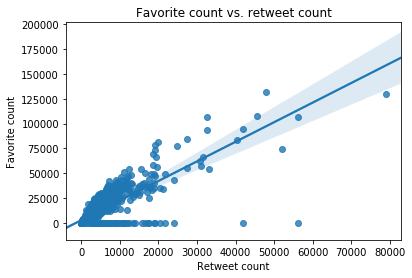

In [65]:
retweet_plot = sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_clean)
retweet_plot.set_xlabel('Retweet count')
retweet_plot.set_ylabel('Favorite count')
retweet_plot.set_title('Favorite count vs. retweet count');

Here we observe strong positive correlation between ‘retweet_count’ and ‘favorite_count’ (thus, popular tweets actually get more likes and retweets - the most obvious hypothesis proved).

In [66]:
image_predictions['first_prediction'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: first_prediction, dtype: int64

Here we have top 10 popular breeds. The question why these are the most popular is still to be answered. According to Wikipedia's https://en.wikipedia.org/wiki/List_of_most_popular_dog_breeds labradors are indeed worldwide popular, but what about the others - could it be because they are easier to be identified by the neural network? Yet to be found out.

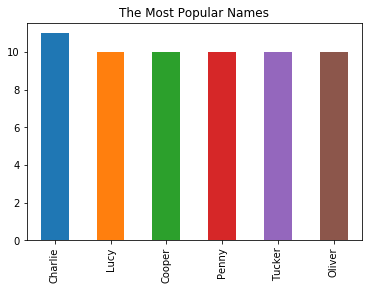

In [67]:
top=df.groupby('name').filter(lambda x: len(x) >= 10)
top['name'].value_counts().plot(kind = 'bar')
plt.title('The Most Popular Names');

This is the list of the most popular dog names based on our data. The names are of English origin as this twitter is poplar mostly in the USA and other English-speaking countries. We can also conclude that most of the featured dogs are supposedly male.

Twitter for iphone    2031
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64


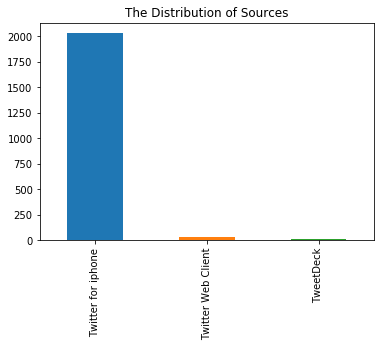

In [68]:
#Counting and visualizing sources distribution.
top=df.groupby('source').filter(lambda x: len(x) >= 10)
top['source'].value_counts().plot(kind = 'bar')
plt.title('The Distribution of Sources')
print(twitter_archive_clean['source'].value_counts())

Twitter app for Iphone is by far the most popular source from these three available in our data sets.